In [1]:
from sys import path
from pathlib import Path
path.append(str(Path.cwd().parent))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data.dataset import CS_Dataset, CS_DataModule
import SimpleITK as sitk
import nibabel as nb
from tqdm import tqdm

In [3]:
dataset = CS_Dataset('bvisa',
                     'train')
print(len(dataset))

dm = CS_DataModule()

38


In [4]:
from monai.networks.nets import UNet
import torch

In [5]:
tdl = dm.train_dataloader()

for bix, batch in enumerate(tdl):
    print(batch['image'].shape)
    print(batch['target'].shape)
    print(batch['caseid'])
    break

torch.Size([1, 1, 124, 256, 256])
torch.Size([1, 124, 256, 256])
['anubis']


In [10]:
batch['target'].shape

torch.Size([1, 124, 256, 256])

In [14]:
torch.unsqueeze(batch['target'], dim=0).shape

torch.Size([1, 1, 124, 256, 256])

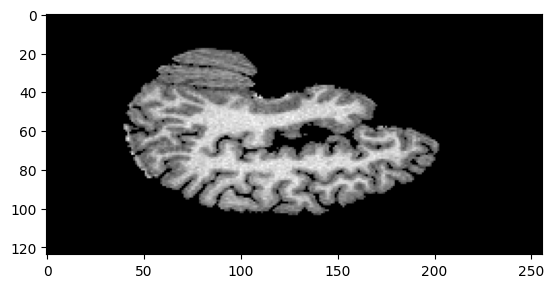

In [9]:
img = batch['image']

plt.imshow(img[0, 0, :, :, 80], cmap='gray')

In [12]:
net = UNet(spatial_dims=3,
           in_channels=1,
           out_channels=1,
           channels=(24, 48, 96, 192, 384),
           strides=(1, 1, 1, 1),
           )


In [13]:
net

UNet(
  (model): Sequential(
    (0): Convolution(
      (conv): Conv3d(1, 24, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(24, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): PReLU(num_parameters=1)
      )
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): Convolution(
          (conv): Conv3d(24, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): InstanceNorm3d(48, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (1): SkipConnection(
          (submodule): Sequential(
            (0): Convolution(
              (conv): Conv3d(48, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
              (adn): ADN(
                (N): Inst

In [14]:
model_input = torch.rand(1, 1, 256, 256, 256)
output = net(model_input)

In [15]:
output.shape

torch.Size([1, 1, 256, 256, 256])